In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [46]:
### Kernel function generators
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))
 
def RBF_kernel(W,X,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||w_i-x_j||^2/(2 sigma^2)) in position i,j
    """
    k = scipy.spatial.distance.cdist(W, X, 'sqeuclidean')
    k *= -1.0/(2*np.square(sigma))

    return np.exp(k)

def polynomial_kernel(W, X, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <w_i,x_j>)^degree in position i,j
    """
    k = linear_kernel(W, X)
    k = offset + k
    k = np.power(k,degree)
    return k
    


In [52]:
# compute the kernel matrix
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
print(y)

[[ 24.    23.96  23.92 ..., -23.88 -23.92 -23.96]
 [  6.     5.99   5.98 ...,  -5.97  -5.98  -5.99]
 [ -0.    -0.    -0.   ...,   0.     0.     0.  ]
 [-12.   -11.98 -11.96 ...,  11.94  11.96  11.98]]


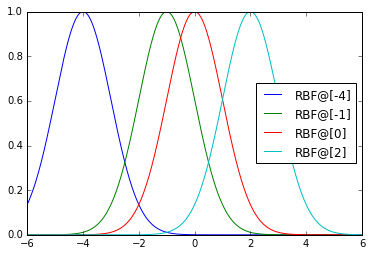

In [227]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# RBF kernel
y = RBF_kernel(prototypes, xpts,sigma=1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/rbf.jpg')
 
 

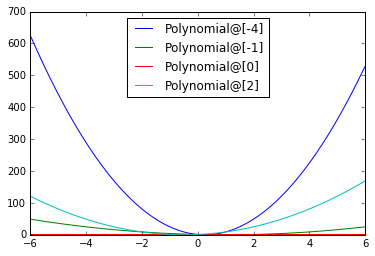

In [228]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
offset = 1
degree = 2

# polynomial_kernel
y = polynomial_kernel(prototypes, xpts, offset, degree)
for i in range(len(prototypes)):
    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/poly.jpg')

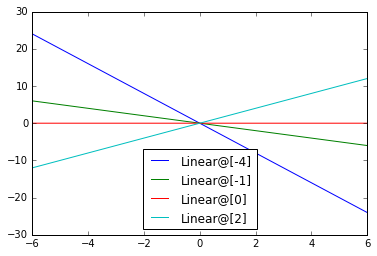

In [226]:
# Plot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/linear.jpg')

In [62]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(W,X) - a function return the cross-kernel matrix between rows of W and rows of X for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):#xpts
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        y = self.kernel(self.prototype_points, X)
        y = np.dot(np.transpose(y), self.weights)
        return y
        

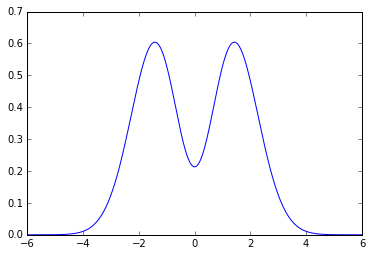

In [229]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-1, 0, 1]).reshape(-1,1)
W = np.array([1, -1, 1]).reshape(-1,1)
sigma = 1

k = functools.partial(RBF_kernel, sigma=sigma)
f = Kernel_Machine(k, prototypes, W)
y = f.predict(xpts)
plt.plot(xpts, y)
#plt.legend(loc = 'best')
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/rep.jpg')

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [232]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

In [145]:
x_train.shape[0]

100

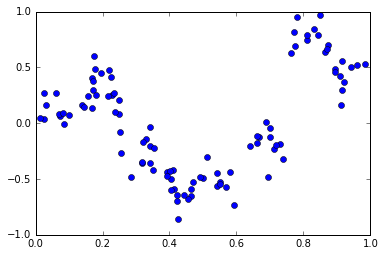

In [233]:
#plot the training data
plt.plot(x_train,y_train,'o')
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/train.jpg')

In [186]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    '''
    X is prototype_points, which is the training set.
    y actual value of y
    kernel is kernel machine types
    －－－－－－－－－－－－－－－－－－－－－
    alpha is the weight matrix
    '''
    N = X.shape[0]
    reg = np.identity(N) * l2reg
    k = kernel(X,X)
    alpha = reg + k
    alpha = np.linalg.inv(alpha)
    alpha = np.dot(alpha, y).reshape(-1,1)
    return Kernel_Machine(kernel, X, alpha)

### RBF plot

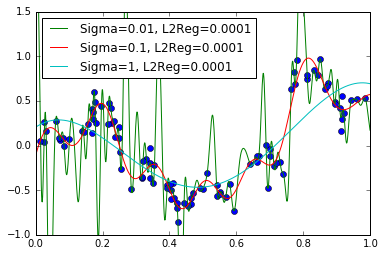

In [235]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+", L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/rbf2.jpg')
#which one are more likely to overfit?
#0.01 overfitting
#1 underfitting

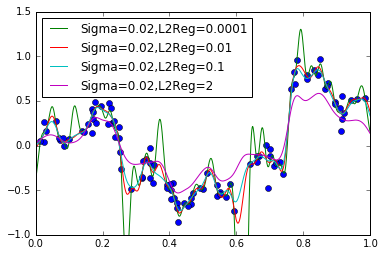

In [236]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/rbf3.jpg')

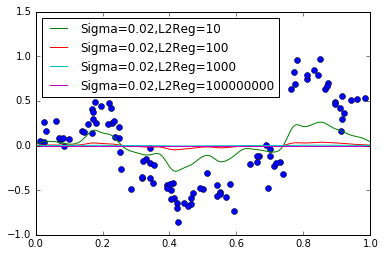

In [238]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [10,100,1000,100000000]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/rbf4.jpg')
#when lambda approaching infinity, the line approch horizontal stright line

In [192]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [239]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [240]:
param_grid = [{'kernel': ['RBF'],'sigma':[.001,0.1,100], 'l2reg': np.exp2(-np.arange(-10,10,0.01))},
              {'kernel':['polynomial'],'offset':range(-10,10), 'degree':range(20),'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [100,10,1,.01,0.001,0.0001]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.001, 0.1, 100], 'l2reg': array([  1.02400e+03,   1.01693e+03, ...,   9.90195e-04,   9.83355e-04])}, {'offset': range(-10, 10), 'kernel': ['polynomial'], 'degree': range(0, 20), 'l2reg': [10, 0.1, 0.01]}, {'kernel': ['linear'], 'l2reg': [100, 10, 1, 0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [241]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_sqloss'] = -df['mean_test_score']
df['mean_train_sqloss'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_sqloss","mean_train_sqloss"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow = df_toshow.sort_values(by=["mean_test_sqloss"])
df_toshow.to_csv('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/grid.csv')

In [242]:
df_toshow

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_sqloss,mean_train_sqloss
5998,-,RBF,0.000983,-,0.1,1.489041e-02,0.014938
5995,-,RBF,0.000990,-,0.1,1.489184e-02,0.014945
5992,-,RBF,0.000997,-,0.1,1.489327e-02,0.014951
5989,-,RBF,0.001004,-,0.1,1.489471e-02,0.014957
5986,-,RBF,0.001011,-,0.1,1.489617e-02,0.014964
5983,-,RBF,0.001018,-,0.1,1.489763e-02,0.014970
5980,-,RBF,0.001025,-,0.1,1.489911e-02,0.014977
5977,-,RBF,0.001032,-,0.1,1.490060e-02,0.014983
5974,-,RBF,0.001039,-,0.1,1.490209e-02,0.014990
5971,-,RBF,0.001047,-,0.1,1.490361e-02,0.014997


In [208]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.nbinstall(overwrite=True)
qgrid.show_grid(df_toshow)

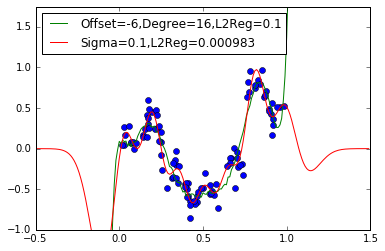

In [243]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -6
degree = 16
l2reg = 0.1
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.1
l2reg= 0.000983
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/best.jpg')

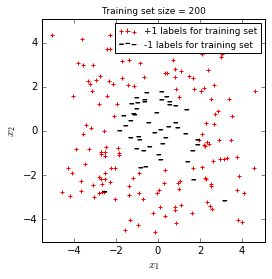

In [244]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.savefig('/Users/twff/Downloads/machine_learning/hw/hw4-kernels/svm.jpg')

In [225]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

NameError: name 'train_soft_svm' is not defined